In [14]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from ast import literal_eval
import re
from ensemblecalibration.utils.plot_functions import plot_error_analysis
from ensemblecalibration.utils.helpers import process_df


In [13]:
# gp data
df_results_mlp_gp = pd.read_csv(
    "../ensemblecalibration/results/gp/2024-06-10-09-01-14/t1t2_binary_mlp_50_x_no_x.csv"
)
df_results_mlp_no_x_dep_gp = pd.read_csv(
    "../ensemblecalibration/results/gp/2024-05-28-22-23-31/t1t2_binary_mlp_no_x_dep_30.csv"
)
df_results_cobyla_gp = pd.read_csv(
    "../ensemblecalibration/results/gp/2024-06-12-16-21-27/t1t2_binary_no_dep_dep_cobyla_40.csv"
)

df_results_mlp_dirichlet_brier = pd.read_csv(
    "../ensemblecalibration/results/dirichlet/2024-08-05-02-07-18/t1t2_brier_dirichlet_100.csv"
)

# dirichlet data
df_results_mlp_dirichlet = pd.read_csv(
    "../ensemblecalibration/results/dirichlet/2024-06-28-14-06-38/t1t2_mlp_dirichlet_40.csv"
)

df_results_cobyla_dirichlet = pd.read_csv(
    "../ensemblecalibration/results/dirichlet/2024-06-28-10-52-39/t1t2_cobyla_dirichlet_40.csv"
)

In [9]:
# get first 2 rows and first two columns of df_results_mlp_gp
df_results_mlp_gp_t1 = df_results_mlp_gp.iloc[:2, :2]
#df_results_mlp_gp_t1 = df_results_mlp_gp.iloc[:2]
df_results_cobyla_gp_t1 = df_results_cobyla_gp.iloc[:2, :2]

# t2 errors, gp experiment
df_results_mlp_gp_t2 = df_results_mlp_gp.iloc[2:, :2]
df_results_cobyla_gp_t2 = df_results_cobyla_gp.iloc[2:, :2]

# t1 errors, dirichlet experiment
df_results_mlp_dirichlet_t1 = df_results_mlp_dirichlet.iloc[:2, :2]
df_results_cobyla_dirichlet_t1 = df_results_cobyla_dirichlet.iloc[:2, :2]
df_results_mlp_dirichlet_brier_t1 = df_results_mlp_dirichlet_brier.iloc[:2, :2]

# t2 errors, dirichlet experiment
df_results_mlp_dirichlet_t2 = df_results_mlp_dirichlet.iloc[2:, :2]
df_results_cobyla_dirichlet_t2 = df_results_cobyla_dirichlet.iloc[2:, :2]
df_results_mlp_dirichlet_brier_t2 = df_results_mlp_dirichlet_brier.iloc[2:, :2]


### Experiment I:
binary classification with Gaussian processes as underlying predictors.


In [10]:

alphas = [0.05, 0.13, 0.21, 0.30, 0.38, 0.46, 0.54, 0.62, 0.70, 0.78, 0.87, 0.95]
list_col_titles = [
        "$H_0, \lambda=const$",
        "$H_0, \lambda=f(x)$",
        "$H_1, S_1$",
        "$H_1, S_2$",
        "$H_1, S_3$",
    ]

<>:3: SyntaxWarning: invalid escape sequence '\l'
<>:4: SyntaxWarning: invalid escape sequence '\l'
<>:3: SyntaxWarning: invalid escape sequence '\l'
<>:4: SyntaxWarning: invalid escape sequence '\l'
/var/folders/mf/gnm849bj4fq5xnqhl_bdhf9m0000gn/T/ipykernel_29349/903900135.py:3: SyntaxWarning: invalid escape sequence '\l'
  "$H_0, \lambda=const$",
/var/folders/mf/gnm849bj4fq5xnqhl_bdhf9m0000gn/T/ipykernel_29349/903900135.py:4: SyntaxWarning: invalid escape sequence '\l'
  "$H_0, \lambda=f(x)$",


In [11]:
df_results_mlp_gp_t1
`

SyntaxError: invalid syntax (1250635553.py, line 2)

   LP SKCE
0  []   []
1  []   []


ValueError: x and y must have same first dimension, but have shapes (12,) and (0,)

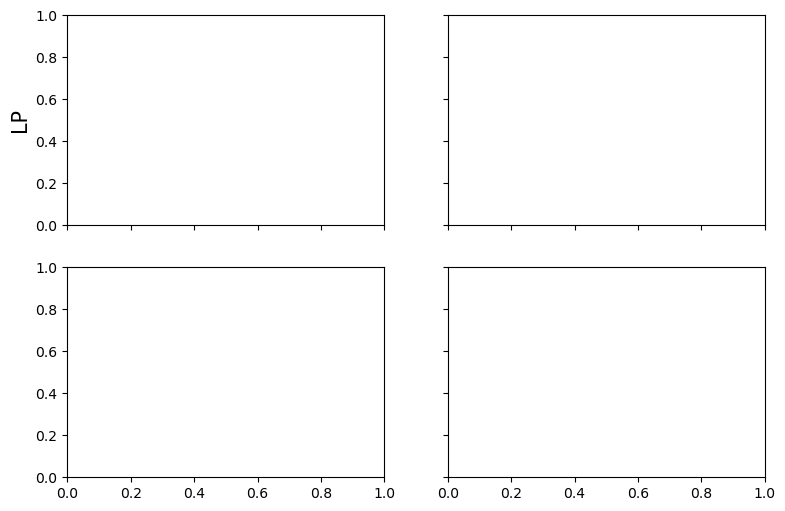

In [12]:
sns.set_palette("viridis")
fig = plot_error_analysis(
    df=df_results_mlp_gp_t1,
    list_errors=df_results_mlp_gp_t1.columns,
    figsize=(9, 6),
    title="Type $1$ error analysis, \n MLP",
    list_col_titles=list_col_titles[:2],

)
plt.savefig(
    "../figures/t1_errors_analysis_mlp_gp_t1.png",
    dpi=400,
    bbox_inches="tight",
)

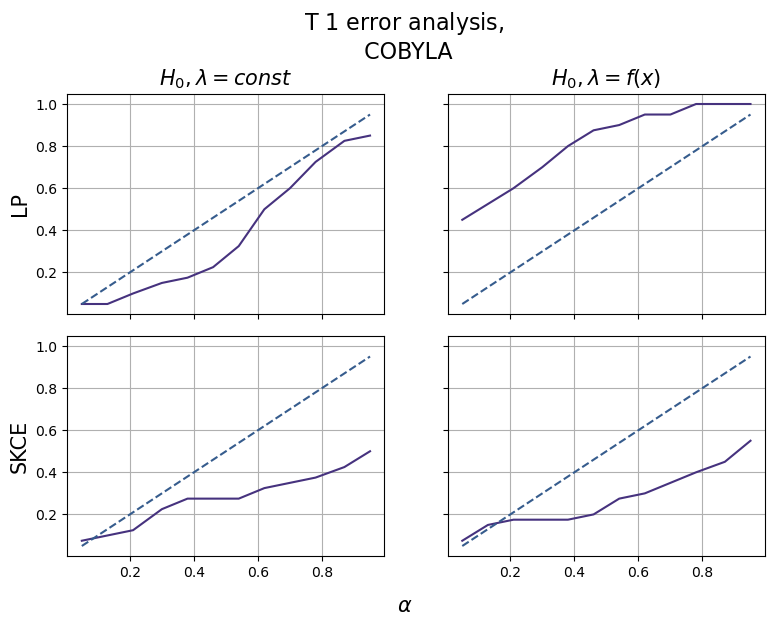

In [28]:
fig_cobyla = plot_error_analysis(
    df=df_results_cobyla_gp_t1,
    list_errors=df_results_cobyla_gp_t1.columns,
    figsize=(9, 6),
    title="T $1$ error analysis, \n COBYLA",
    list_col_titles=list_col_titles[:2],
)
plt.savefig(
    "../figures/t1_errors_analysis_cobyla_gp_t1.png",
    dpi=400,
    bbox_inches="tight",
)

#### Type $2$ error analysis:

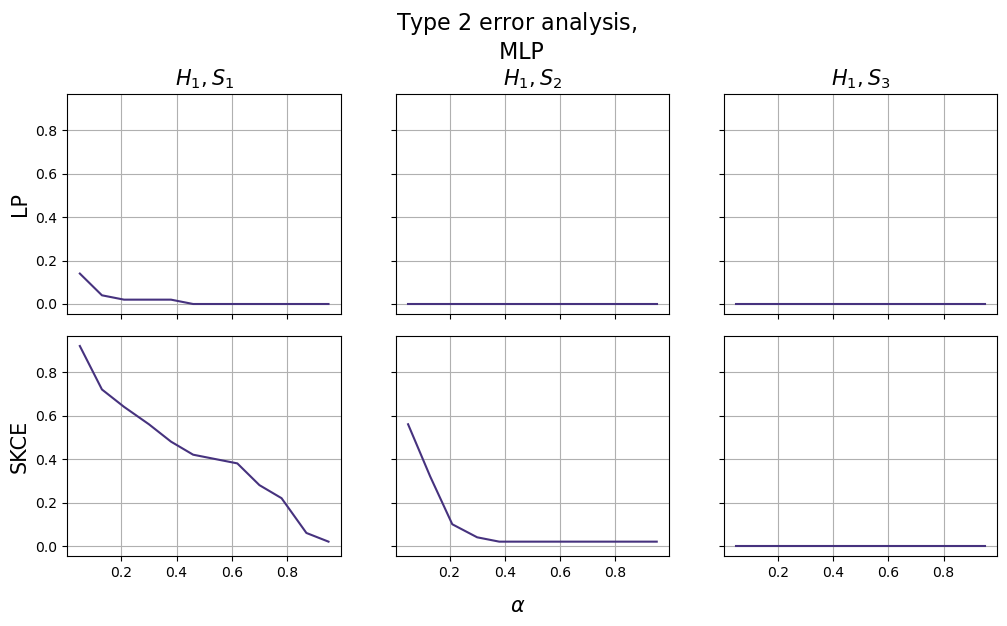

In [27]:
fig = plot_error_analysis(
    df=df_results_mlp_gp_t2,
    list_errors=df_results_mlp_gp_t2.columns,
    figsize=(12, 6),
    title="Type $2$ error analysis, \n MLP",
    list_col_titles=list_col_titles[2:],
    scatter_line=False

)
plt.savefig(
    "../figures/errors_analysis_mlp_gp_t2.png",
    dpi=400,
    bbox_inches="tight",
)

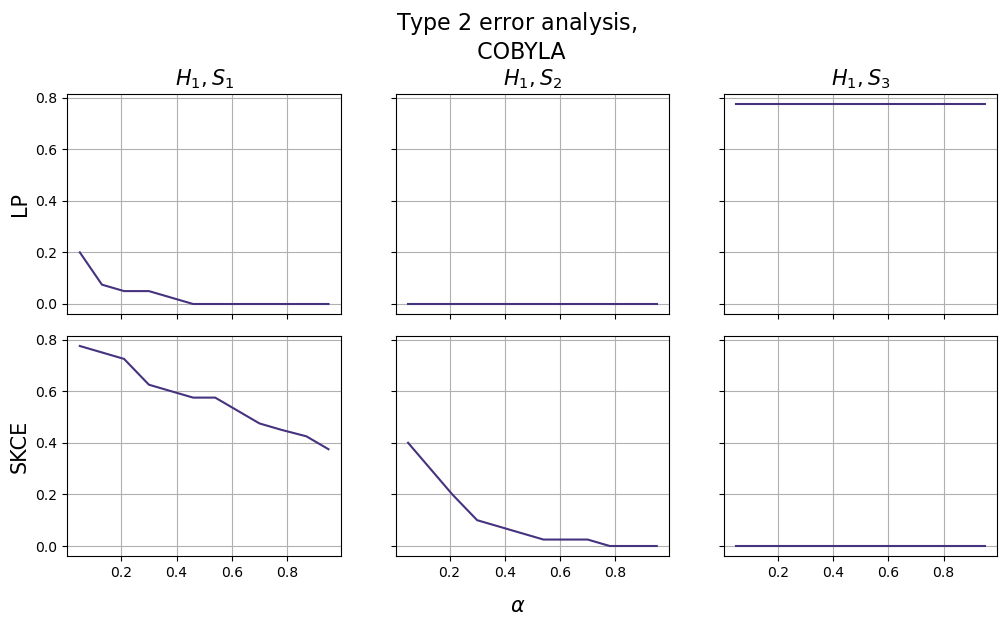

In [26]:
fig_cobyla = plot_error_analysis(
    df=df_results_cobyla_gp_t2,
    list_errors=df_results_cobyla_gp_t2.columns,
    figsize=(12, 6),
    title="Type $2$ error analysis, \n COBYLA",
    list_col_titles=list_col_titles[2:],
    scatter_line=False
)

plt.savefig(
    "../figures/errors_analysis_cobyla_gp_t2.png",
    dpi=400,
    bbox_inches="tight",
)

### Experiment 2:
multi-class classification with predictors sampled from a Dirichlet distribution:

#### Type $1$ error analysis:

In [24]:
list_n = re.findall(r"np\.float64\((.*?)\)", df_results_mlp_dirichlet_brier["MMD"][0])
#df_results_mlp_dirichlet_brier["MMD"][0]
[float(num) for num in list_n]

[0.14, 0.29, 0.59, 0.83, 0.97, 0.97, 0.97, 0.98, 0.98, 0.98, 0.98, 0.98]

In [10]:
df_results_mlp_dirichlet_t1

,LP,SKCE
0,"[0.025, 0.025, 0.05, 0.1, 0.125, 0.125, 0.2, 0...","[0.075, 0.25, 0.325, 0.5, 0.625, 0.7, 0.725, 0..."
1,"[0.075, 0.075, 0.075, 0.225, 0.3, 0.35, 0.425,...","[0.1, 0.225, 0.25, 0.35, 0.5, 0.625, 0.7, 0.8,..."


ValueError: malformed node or string: [0.14, 0.29, 0.59, 0.83, 0.97, 0.97, 0.97, 0.98, 0.98, 0.98, 0.98, 0.98]

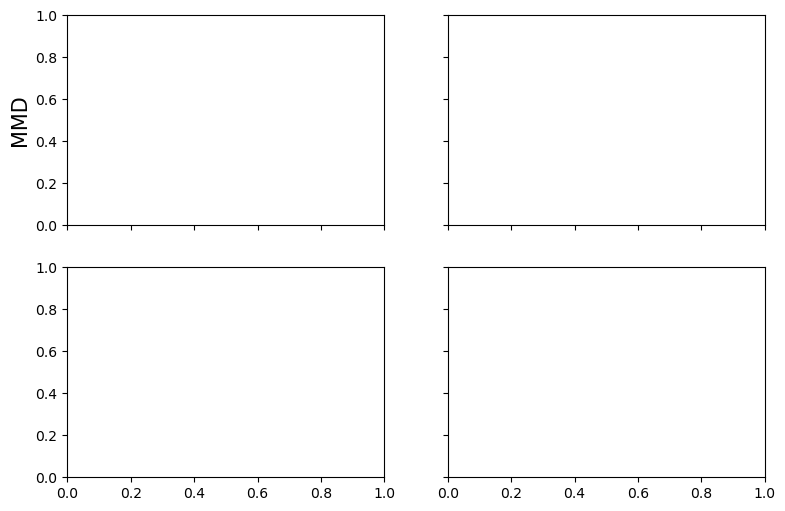

In [30]:
fig = plot_error_analysis(
    df=process_df(df_results_mlp_dirichlet_brier_t1),
    list_errors=df_results_mlp_dirichlet_brier_t1.columns,
    title="Type $1$ error analysis, \n MLP",
    list_col_titles=list_col_titles[:2],
    figsize=(9, 6),

)

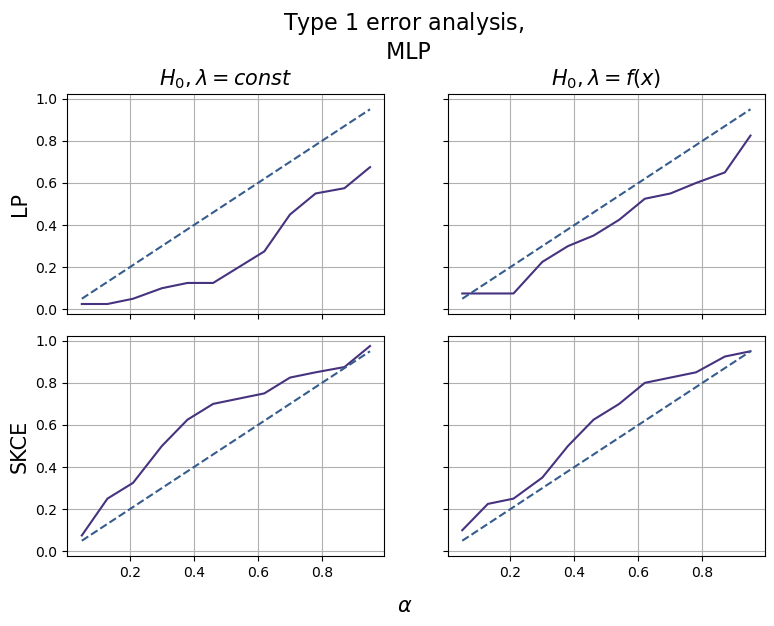

In [25]:
fig = plot_error_analysis(
    df=df_results_mlp_dirichlet_t1,
    list_errors=df_results_mlp_dirichlet_t1.columns,
    title="Type $1$ error analysis, \n MLP",
    list_col_titles=list_col_titles[:2],
    figsize=(9,6)
)

plt.savefig(
    "../figures/errors_analysis_mlp_dirichlet_t1.png",
    dpi=400,
    bbox_inches="tight",
)

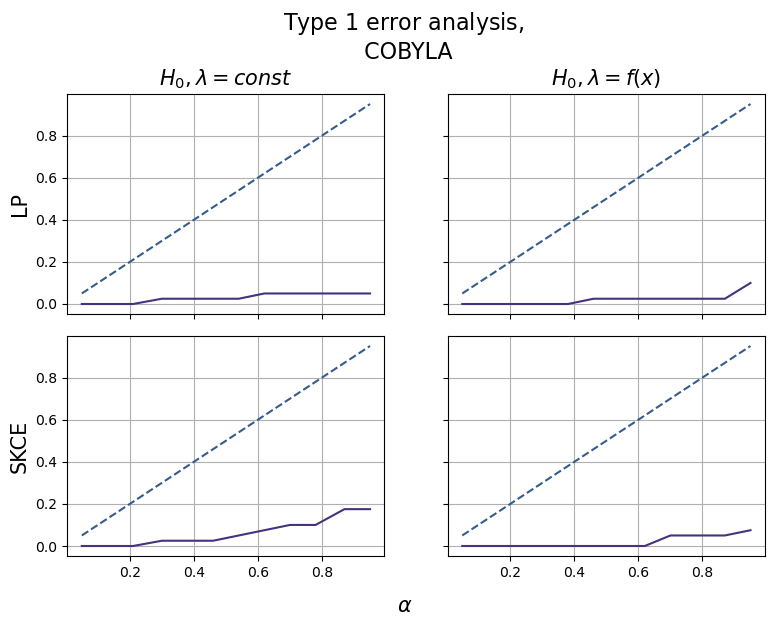

In [24]:
# same for cobyla
fig_cobyla = plot_error_analysis(
    df=df_results_cobyla_dirichlet_t1,
    list_errors=df_results_cobyla_dirichlet_t1.columns,
    title="Type $1$ error analysis, \n COBYLA",
    list_col_titles=list_col_titles[:2],
    figsize=(9,6)
)

plt.savefig(
    "../figures/errors_analysis_cobyla_dirichlet_t1.png",
    dpi=400,
    bbox_inches="tight",
)

#### Type $2$ error analysis

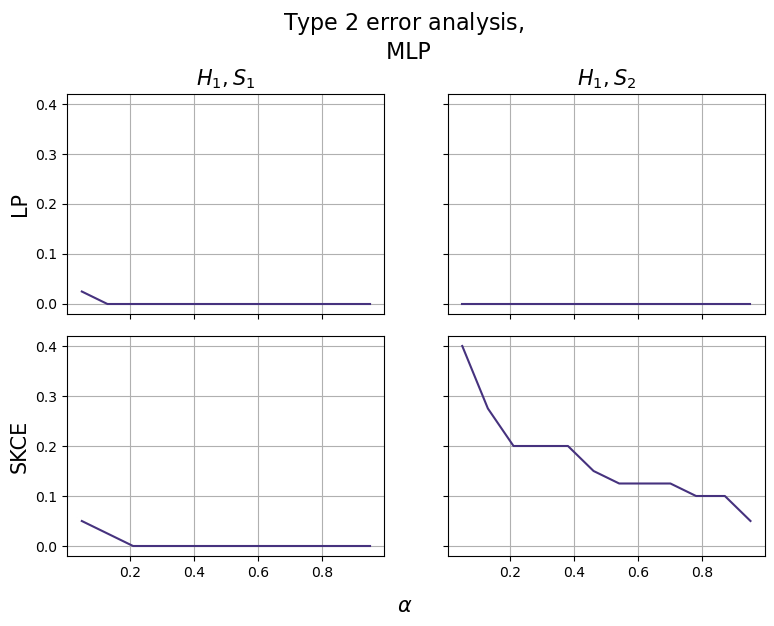

In [31]:
# mlp
fig = plot_error_analysis(
    df=df_results_mlp_dirichlet_t2,
    list_errors=df_results_mlp_dirichlet_t2.columns,
    title="Type $2$ error analysis, \n MLP",
    list_col_titles=list_col_titles[2:-1],
    figsize=(9,6),
    scatter_line=False
)

plt.savefig(
    "../figures/errors_analysis_mlp_dirichlet_t2.png",
    dpi=400,
    bbox_inches="tight",
)

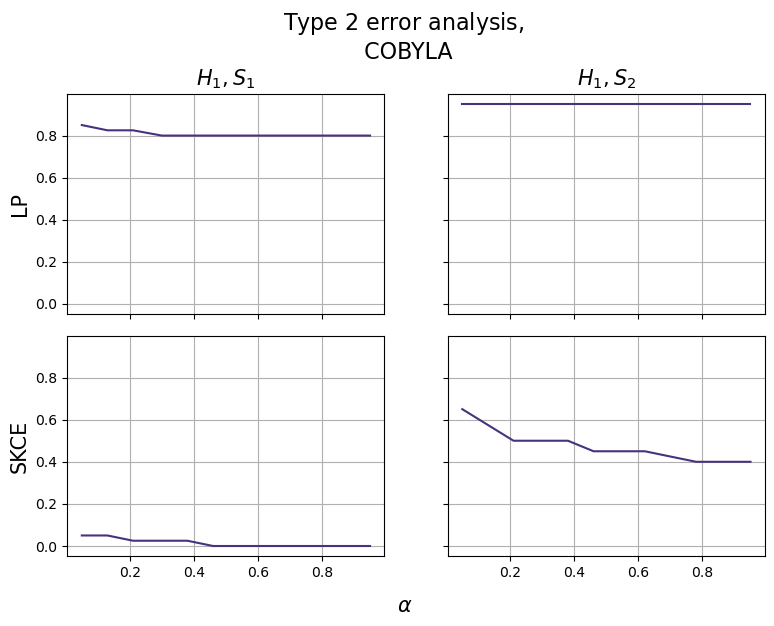

In [30]:
# same for cobyla
fig_cobyla = plot_error_analysis(
    df=df_results_cobyla_dirichlet_t2,
    list_errors=df_results_cobyla_dirichlet_t2.columns,
    title="Type $2$ error analysis, \n COBYLA",
    list_col_titles=list_col_titles[2:-1],
    figsize=(9,6),
    scatter_line=False
)

plt.savefig(
    "../figures/errors_analysis_cobyla_dirichlet_t2.png",
    dpi=400,
    bbox_inches="tight",
)